**<h1> Industrial Production Food</h1>**

# **phase 1**

# **Data Preparation and Exploration**

In [1]:
# Install necessary packages
install.packages("tseries")
install.packages("forecast")
install.packages("readxl")
install.packages("ggplot2")
install.packages("zoo")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load necessary libraries

library(tseries)
library(forecast)
library(ggplot2)
library(zoo)
library(readxl) # Added this line to load the 'readxl' package


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
#load data


# Load data
#food_data <- read_excel("/content/Industrial_Production_food _S_C11.xlsx")
food_data <- read_excel("/content/Industrial_Production_food_S_C11_prepared.xlsx")
real_estate_data <- read_excel("/content/value_of_real_estate_constructions_prepared.xlsx")


In [4]:
# Install the package if you don't have it
install.packages("psych")

# Load the package
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [7]:
str(food_data)
describe(food_data)

tibble [627 × 2] (S3: tbl_df/tbl/data.frame)
 $ observation_date: POSIXct[1:627], format: "1972-01-01" "1972-02-01" ...
 $ IPG311A2N       : num [1:627] 58.3 58.2 58.7 59.7 60.1 ...


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
observation_date,1,627,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
IPG311A2N,2,627,86.09058,12.96079,90.7223,87.04822,12.7723,56.7317,105.3684,48.6367,-0.5577016,-0.9575427,0.5176041


In [8]:
head(food_data)

observation_date,IPG311A2N
<dttm>,<dbl>
1972-01-01,58.2833
1972-02-01,58.2441
1972-03-01,58.7269
1972-04-01,59.6957
1972-05-01,60.1183
1972-06-01,62.8722


In [9]:
food_data

observation_date,IPG311A2N
<dttm>,<dbl>
1972-01-01,58.2833
1972-02-01,58.2441
1972-03-01,58.7269
1972-04-01,59.6957
1972-05-01,60.1183
1972-06-01,62.8722
1972-07-01,59.5531
1972-08-01,61.9703
1972-09-01,63.3196


# **Graphical Analysis**

In [13]:
# For food production data
food_ts <- ts(food_data$IPG311A2N, start = c(1972, 1), frequency = 12)

# For real estate data
#real_estate_ts <- ts(real_estate_data$CorrectColumnName, start = c(1982, 1), frequency = 12)

In [14]:
summary(food_ts )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  56.73   75.47   90.72   86.09   96.69  105.37 

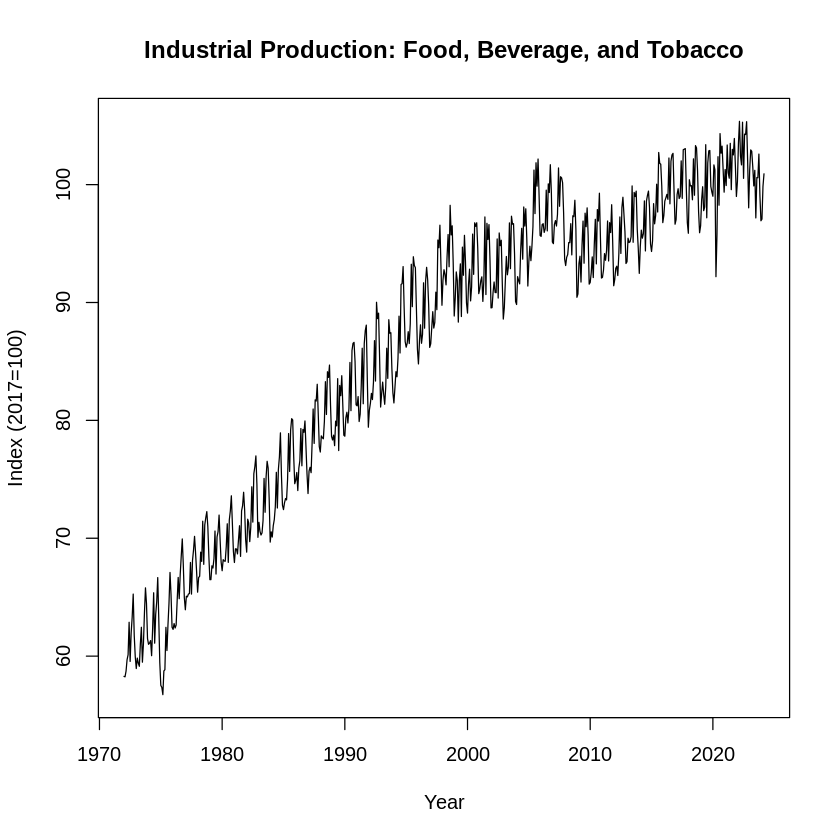

In [15]:
plot(food_ts, main = "Industrial Production: Food, Beverage, and Tobacco",
     xlab = "Year", ylab = "Index (2017=100)")

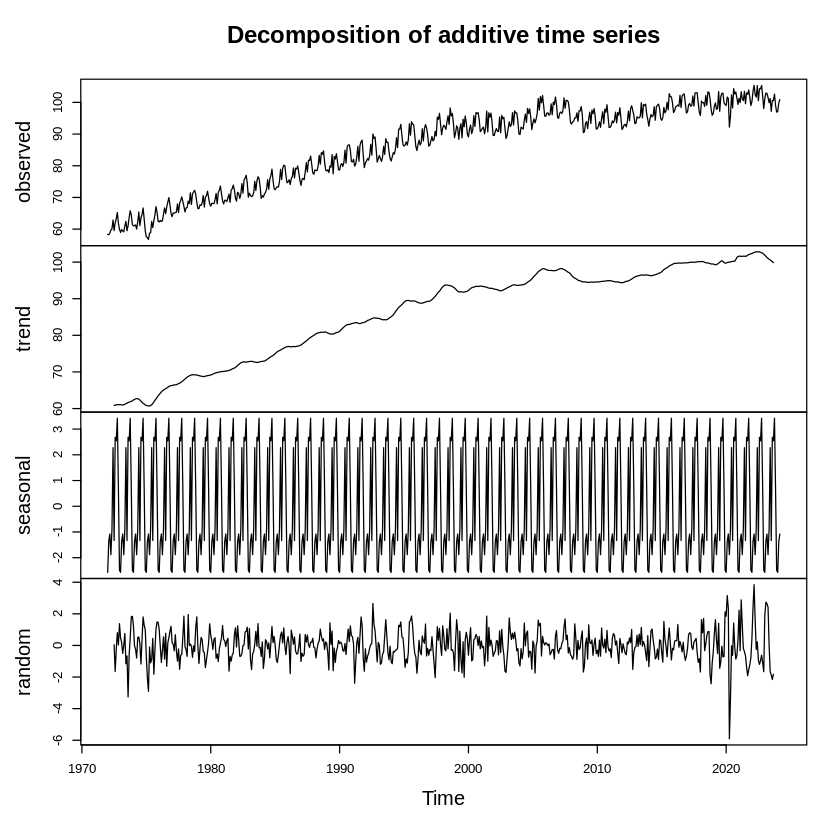

In [16]:
# Decompose the time series
if(length(food_ts) >= 2*12) {  # Need at least 2 full cycles for decomposition
  food_decomp <- decompose(food_ts)
  plot(food_decomp)
}

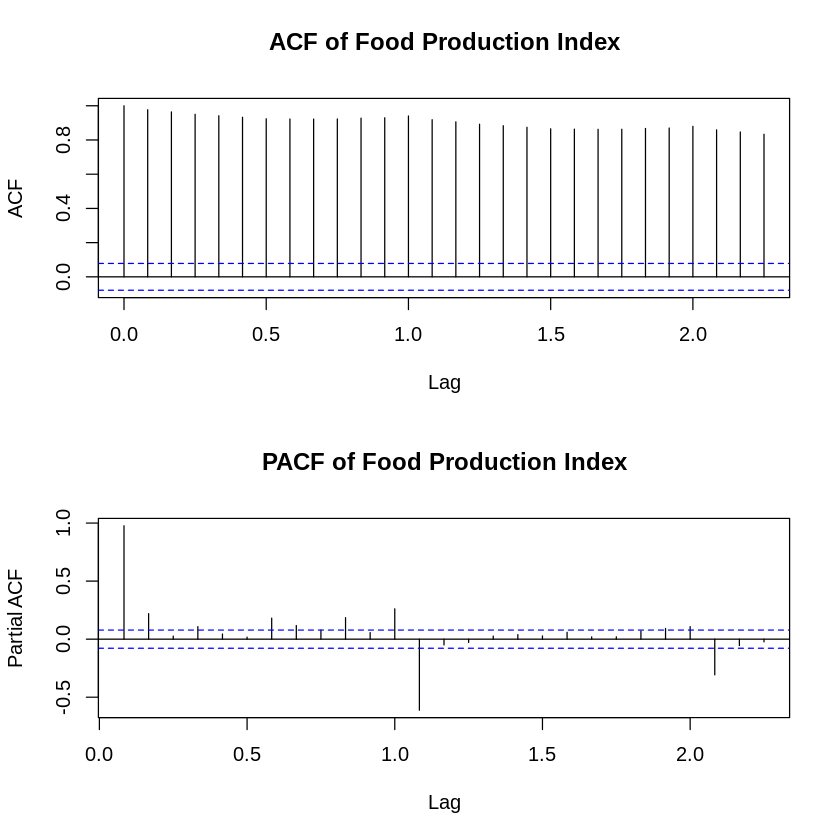

In [17]:
# ACF and PACF plots
par(mfrow = c(2,1))
acf(food_ts, main = "ACF of Food Production Index")
pacf(food_ts, main = "PACF of Food Production Index")

# **Statistical Tests**

In [18]:
# Check for stationarity using ADF test
adf_test <- adf.test(food_ts)
print(adf_test)




	Augmented Dickey-Fuller Test

data:  food_ts
Dickey-Fuller = -2.4185, Lag order = 8, p-value = 0.4012
alternative hypothesis: stationary



ADF test

Dickey–Fuller D = –2.4185, p = 0.4012 → cannot reject a unit root, so the raw series is non‑stationary

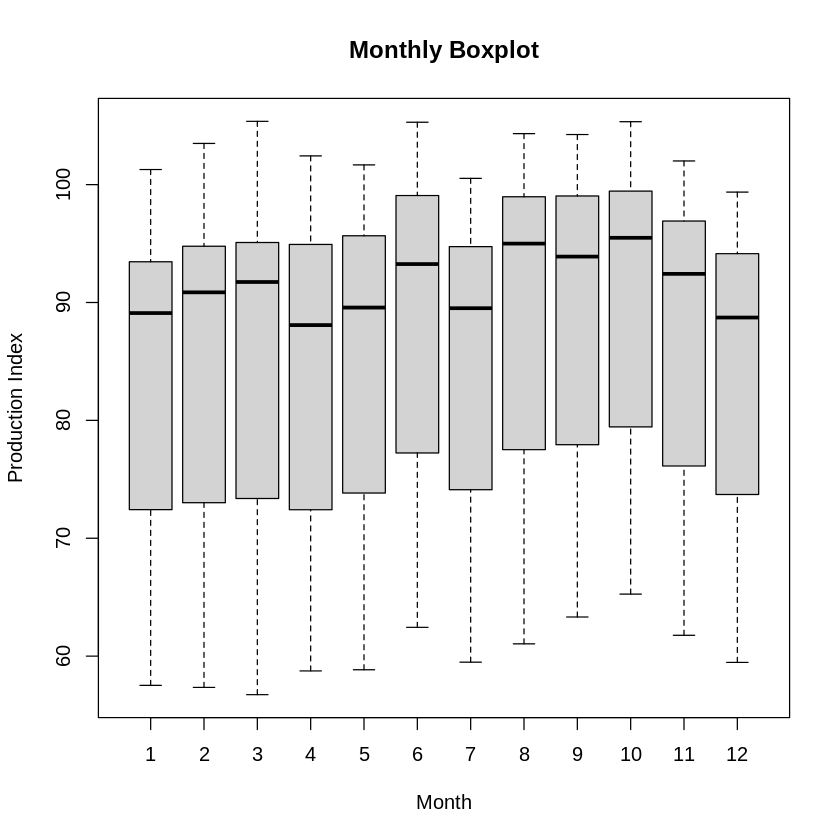

In [19]:
# Check for seasonality
month_boxplot <- boxplot(food_ts ~ cycle(food_ts),
                         main = "Monthly Boxplot",
                         xlab = "Month",
                         ylab = "Production Index")

**<h1>Dataset 2: Real Estate Construction Value</h1>**

Data Preparation and Exploration

In [20]:
real_estate_data

Date,Value
<dttm>,<dbl>
1982-01-01,105.4
1982-02-01,95.4
1982-03-01,145.0
1982-04-01,175.8
1982-05-01,170.2
1982-06-01,163.2
1982-07-01,160.7
1982-08-01,160.7
1982-09-01,147.7


In [21]:
# Check structure of real_estate_data
str(real_estate_data)

tibble [397 × 2] (S3: tbl_df/tbl/data.frame)
 $ Date : POSIXct[1:397], format: "1982-01-01" "1982-02-01" ...
 $ Value: num [1:397] 105.4 95.4 145 175.8 170.2 ...


In [22]:
# View first few rows
head(real_estate_data)

Date,Value
<dttm>,<dbl>
1982-01-01,105.4
1982-02-01,95.4
1982-03-01,145.0
1982-04-01,175.8
1982-05-01,170.2
1982-06-01,163.2


In [23]:
# Extract the column with values using the actual column names
# Replace 'Date' and 'Value' with your actual column names
date_column <- real_estate_data$Date  # Replace 'Date' with your actual date column name
value_column <- real_estate_data$Value  # Replace 'Value' with your actual value column name


In [24]:
# Create time series object
re_ts <- ts(value_column, start = c(1982, 1), frequency = 12)

In [25]:
# Continue with the rest of the analysis as before
# Basic summary statistics
summary(re_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   31.9    84.5   112.3   112.3   140.4   197.9 

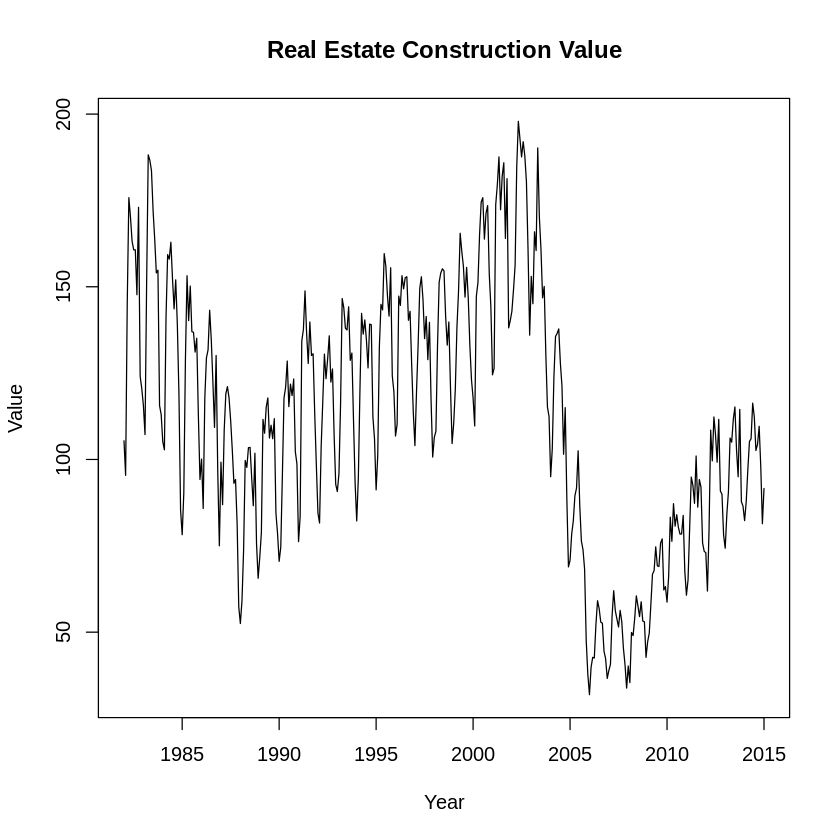

In [26]:
# Plot the time series
plot(re_ts, main = "Real Estate Construction Value",
     xlab = "Year", ylab = "Value")

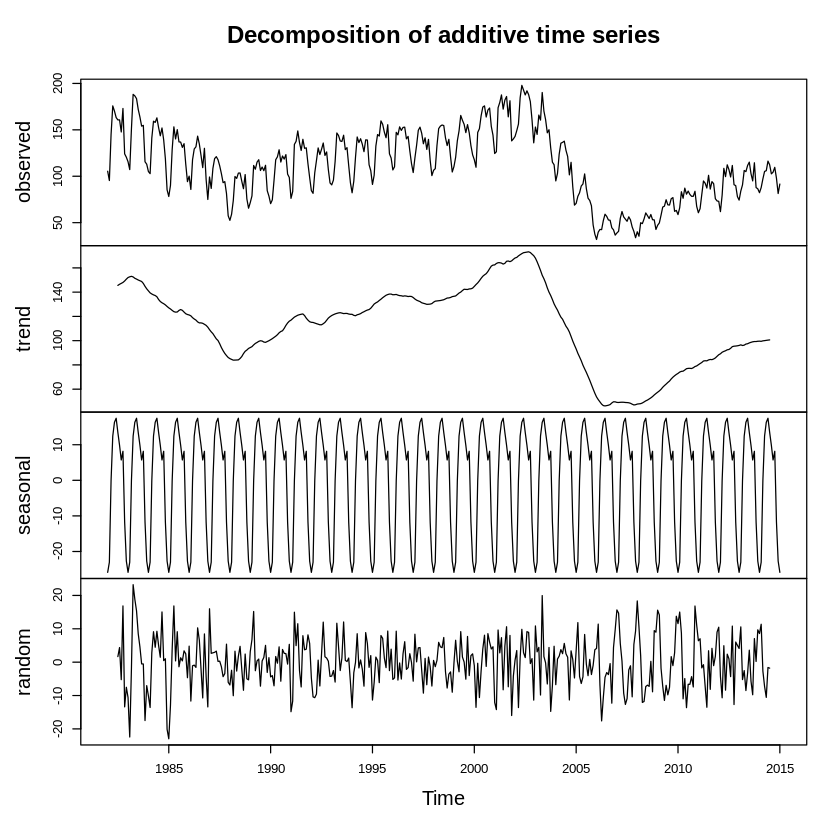

In [27]:
# Decompose the time series
re_decomp <- decompose(re_ts)
plot(re_decomp)


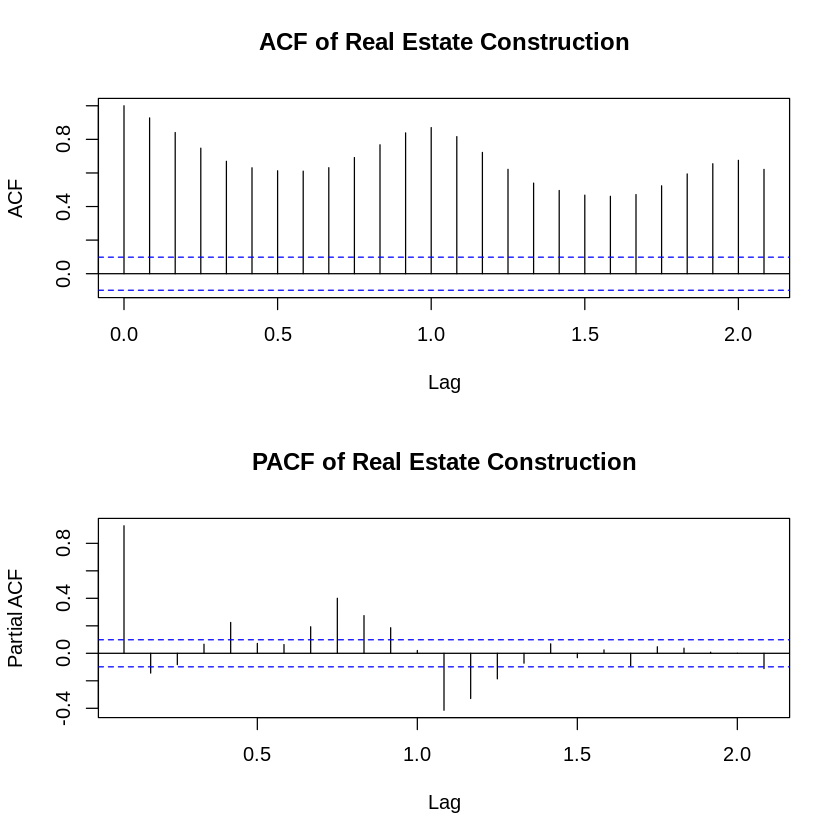

In [28]:
# ACF and PACF plots
par(mfrow = c(2,1))
acf(re_ts, main = "ACF of Real Estate Construction")
pacf(re_ts, main = "PACF of Real Estate Construction")



In [29]:
# Check for stationarity using ADF test
adf_test_re <- adf.test(re_ts)
print(adf_test_re)



	Augmented Dickey-Fuller Test

data:  re_ts
Dickey-Fuller = -2.4293, Lag order = 7, p-value = 0.396
alternative hypothesis: stationary



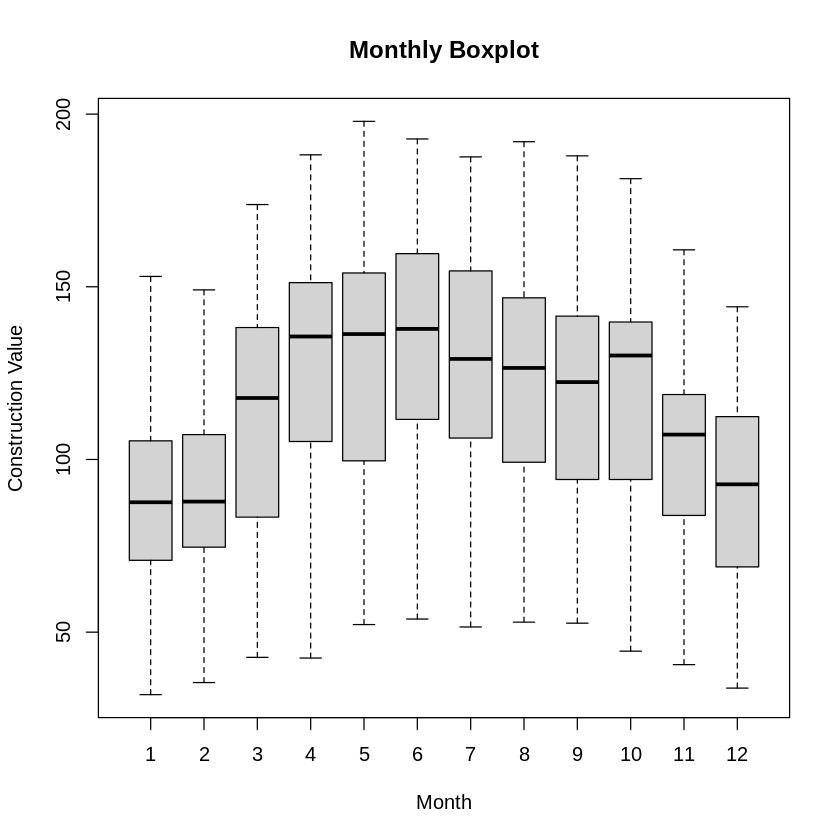

In [30]:

# Check for seasonality
month_boxplot_re <- boxplot(re_ts ~ cycle(re_ts),
                           main = "Monthly Boxplot",
                           xlab = "Month",
                           ylab = "Construction Value")

# **phase 2**

<h3>**Industrial Production Food**</h3>

**Check for Stationarity**

In [31]:
# Test stationarity using ADF test
adf_test_food <- adf.test(food_ts)
print(adf_test_food)

# Check if differencing is needed
ndiffs_food <- ndiffs(food_ts)
nsdiffs_food <- nsdiffs(food_ts)
print(paste("Regular differencing needed:", ndiffs_food))
print(paste("Seasonal differencing needed:", nsdiffs_food))


	Augmented Dickey-Fuller Test

data:  food_ts
Dickey-Fuller = -2.4185, Lag order = 8, p-value = 0.4012
alternative hypothesis: stationary

[1] "Regular differencing needed: 1"
[1] "Seasonal differencing needed: 1"


=> the ADF test and differencing analysis for the food production time series indicates:

Non-stationarity: The ADF test p-value is 0.4012, which is greater than 0.05, meaning we fail to reject the null hypothesis of non-stationarity. This confirms that the original series is not stationary.
Differencing requirements:

Regular differencing needed: 1
Seasonal differencing needed: 1

=>ADF test finds p = 0.4012, so non‑stationary

This suggests that food production time series has both a trend component and a seasonal component that need to be addressed to achieve stationarity.

**Differencing**

Warning message in adf.test(food_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  food_diff
Dickey-Fuller = -18.386, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



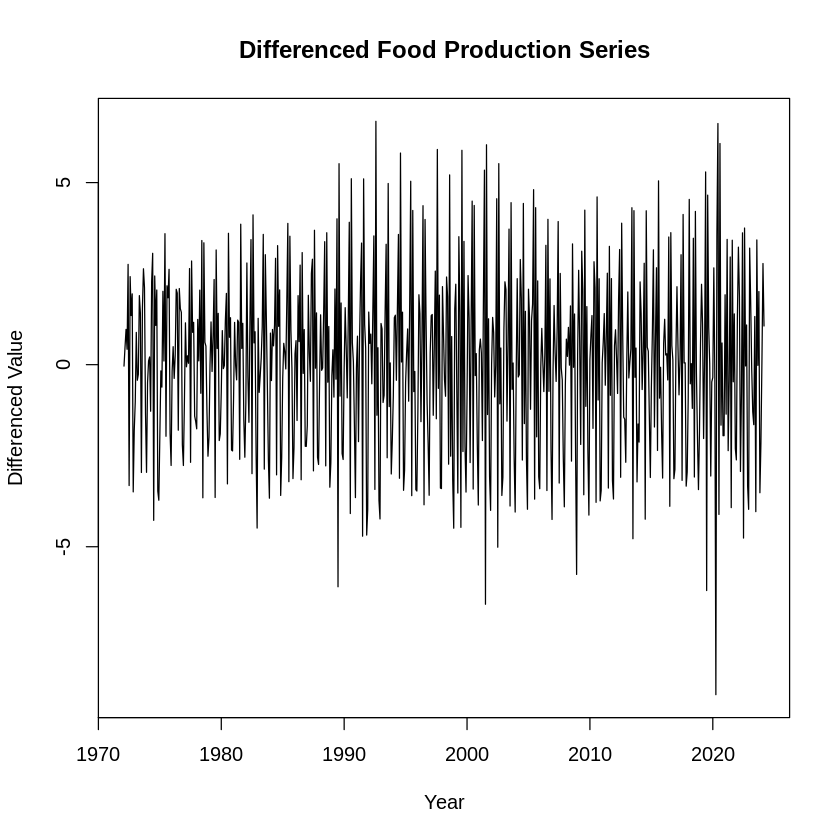

In [32]:
# Apply regular differencing
food_diff <- diff(food_ts, differences = ndiffs_food)
plot(food_diff, main = "Differenced Food Production Series",
     xlab = "Year", ylab = "Differenced Value")
adf_test_food_diff <- adf.test(food_diff)
print(adf_test_food_diff)



Warning message in adf.test(food_sdiff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  food_sdiff
Dickey-Fuller = -6.9473, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



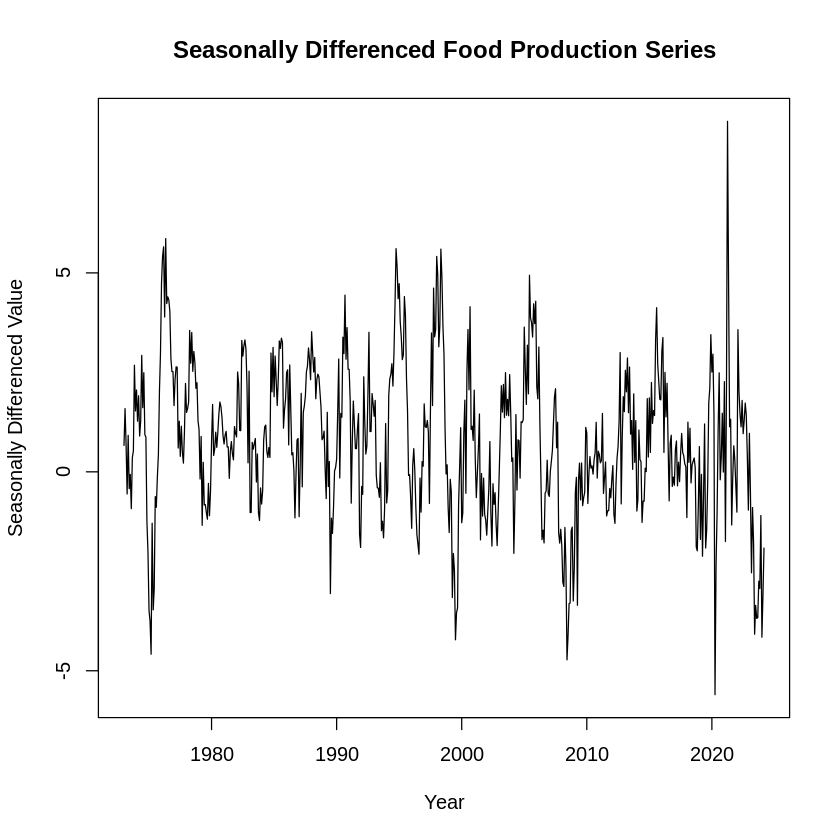

In [33]:
# Apply seasonal differencing
food_sdiff <- diff(food_ts, lag = frequency(food_ts))
plot(food_sdiff, main = "Seasonally Differenced Food Production Series",
     xlab = "Year", ylab = "Seasonally Differenced Value")
adf_test_food_sdiff <- adf.test(food_sdiff)
print(adf_test_food_sdiff)



Warning message in adf.test(food_d_sd):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  food_d_sd
Dickey-Fuller = -9.0056, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



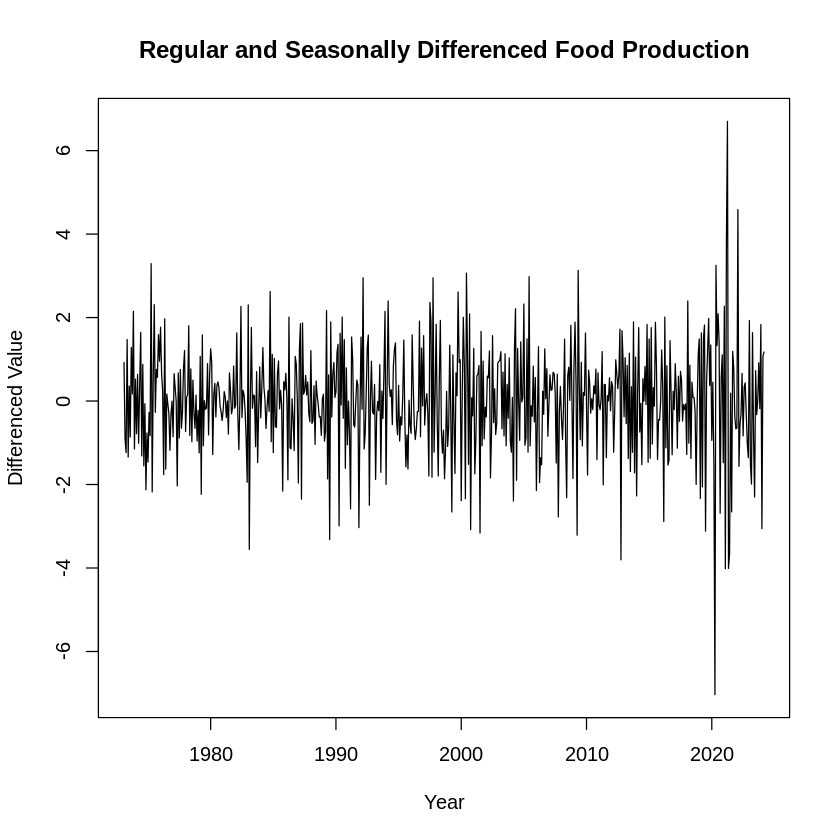

In [34]:
# Apply both regular and seasonal differencing
food_d_sd <- diff(diff(food_ts, lag = frequency(food_ts)))
plot(food_d_sd, main = "Regular and Seasonally Differenced Food Production",
     xlab = "Year", ylab = "Differenced Value")
adf_test_food_d_sd <- adf.test(food_d_sd)
print(adf_test_food_d_sd)

After applying these transformations, you should check:

If the differenced series passes the ADF test (p-value < 0.05)
Whether the ACF and PACF of the differenced series show any remaining patterns

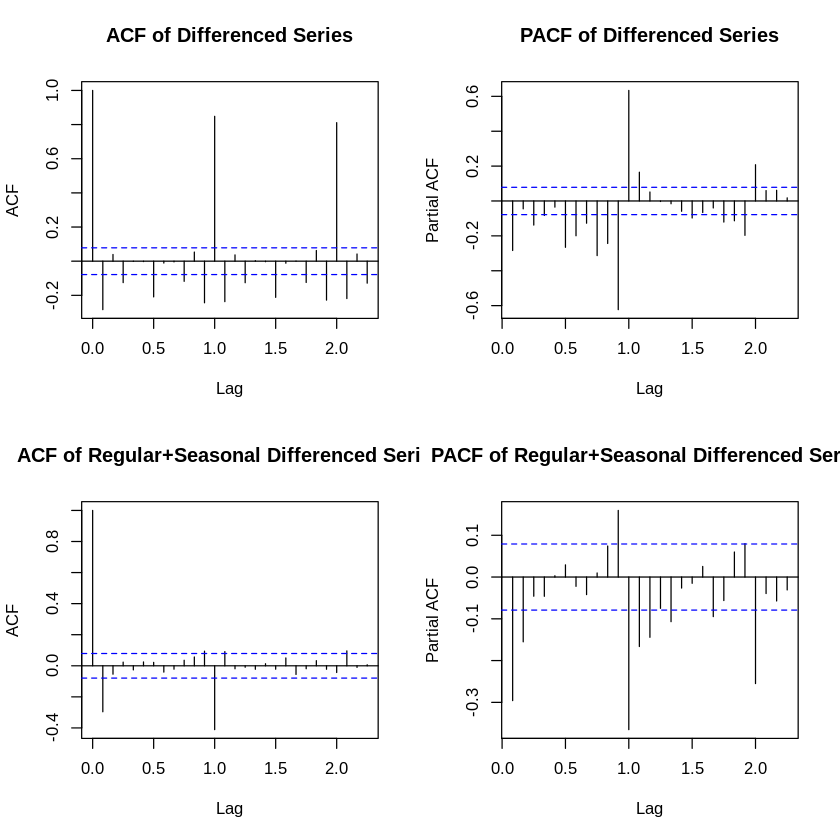

In [35]:
# Check ACF and PACF of differenced series
par(mfrow = c(2,2))
acf(food_diff, main = "ACF of Differenced Series")
pacf(food_diff, main = "PACF of Differenced Series")
acf(food_d_sd, main = "ACF of Regular+Seasonal Differenced Series")
pacf(food_d_sd, main = "PACF of Regular+Seasonal Differenced Series")

Modeling

Linear Trend Model with Seasonal Components




In [37]:
# Create time index and seasonal components
t <- 1:length(food_ts)
nt <- (t - mean(t))/sd(t)  # standardized time

# Create seasonal components using Fourier terms
MC <- matrix(0, length(food_ts), 6)
MS <- matrix(0, length(food_ts), 6)
for(i in 1:6) MC[,i] <- cos(2*pi*t/(12/i))
for(i in 1:6) MS[,i] <- sin(2*pi*t/(12/i))

# Fit models with different specifications
mod_food1 <- lm(food_ts ~ t)  # Simple linear trend
mod_food2 <- lm(food_ts ~ t + I(t^2))  # Quadratic trend
mod_food3 <- lm(food_ts ~ t + MC + MS)  # Linear trend with seasonality

# Compare models using AIC
food_models <- list(mod_food1, mod_food2, mod_food3)
food_aic <- sapply(food_models, AIC)
print(food_aic)
best_model_index <- which.min(food_aic)
print(paste("Best model based on AIC:", best_model_index))


[1] 3585.514 3082.176 3426.215
[1] "Best model based on AIC: 2"


Check for Structural Breaks


In [40]:
install.packages("strucchange")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sandwich’




In [41]:
library(strucchange)

Loading required package: sandwich




	 Optimal 3-segment partition: 

Call:
breakpoints.formula(formula = food_ts ~ t)

Breakpoints at observation number:
323 431 

Corresponding to breakdates:
1998(11) 2007(11) 
[1] 3082.176
[1] 2943.758
[1] 2252.099


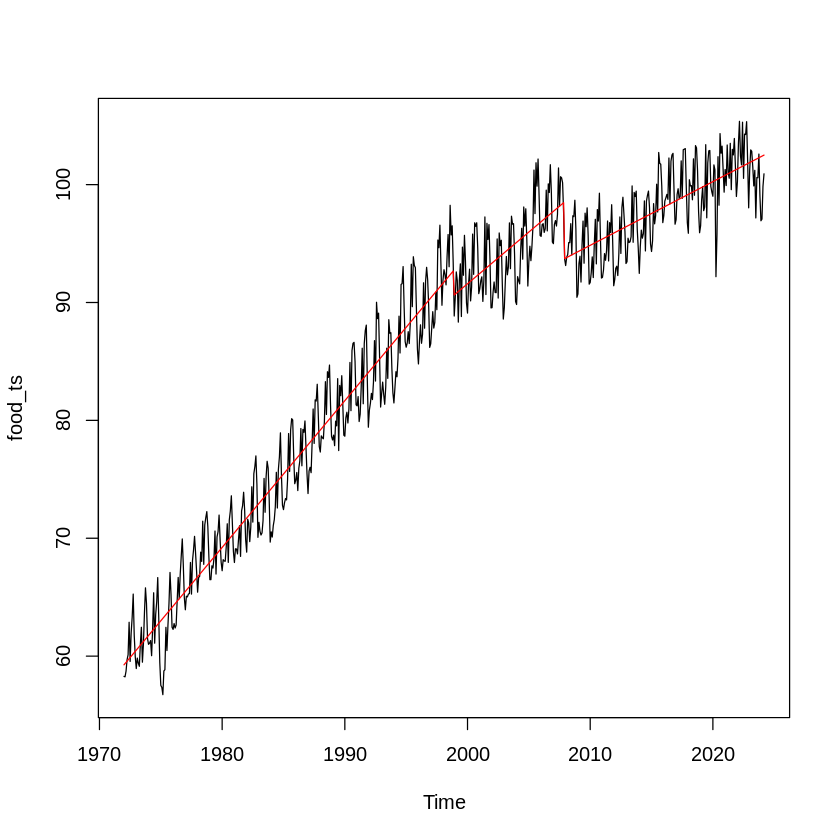

In [42]:
# Check for structural breaks
food_breaks <- breakpoints(food_ts ~ t)
print(food_breaks)
plot(food_ts)
lines(fitted(food_breaks), col = "red")

# Model with structural breaks
if(length(food_breaks$breakpoints) > 0) {
  mod_food_breaks <- lm(food_ts ~ breakfactor(food_breaks)*t)
  summary(mod_food_breaks)

  # Add seasonality to the structural break model
  mod_food_breaks_seas <- lm(food_ts ~ breakfactor(food_breaks)*t +
                           seasonaldummy(food_ts))

  # Compare with previous best model
  print(AIC(food_models[[best_model_index]]))
  print(AIC(mod_food_breaks))
  print(AIC(mod_food_breaks_seas))
}

In [43]:
# Fit ARIMA model to the appropriately differenced series
auto_arima_food <- auto.arima(food_ts, d = ndiffs_food, D = nsdiffs_food,
                             seasonal = TRUE, stepwise = FALSE, approximation = FALSE)
summary(auto_arima_food)



Series: food_ts 
ARIMA(3,1,1)(0,1,1)[12] 

Coefficients:
         ar1     ar2     ar3      ma1     sma1
      0.5865  0.1542  0.1259  -0.9800  -0.7694
s.e.  0.0419  0.0466  0.0412   0.0129   0.0311

sigma^2 = 1.008:  log likelihood = -877.63
AIC=1767.25   AICc=1767.39   BIC=1793.77

Training set error measures:
                      ME      RMSE     MAE         MPE      MAPE      MASE
Training set -0.03446284 0.9896277 0.73875 -0.04061796 0.8621896 0.4622397
                      ACF1
Training set -0.0007671367


	Ljung-Box test

data:  Residuals from ARIMA(3,1,1)(0,1,1)[12]
Q* = 22.13, df = 19, p-value = 0.2778

Model df: 5.   Total lags used: 24



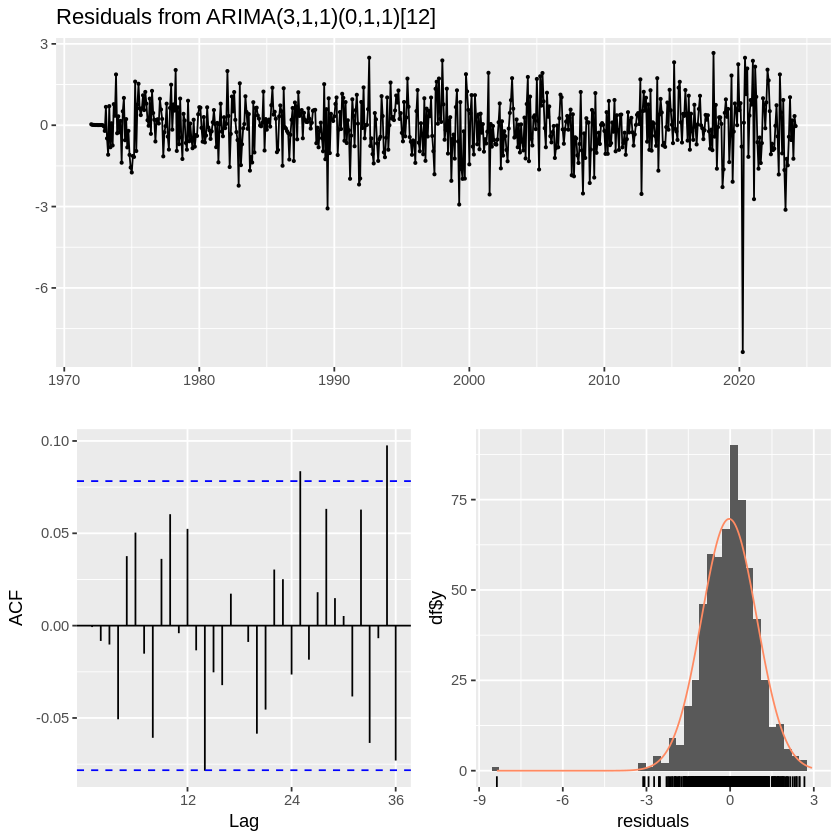

In [44]:
# Check model residuals
checkresiduals(auto_arima_food)

Residual Analysis
Autocorrelation

Ljung–Box χ²(24) = 22.13, p = 0.5715 → no significant autocorrelation remains in residuals

In [45]:
# Compare with previous best model using AIC
print(AIC(auto_arima_food))

[1] 1767.253


Auto‑ARIMA

Selected ARIMA(3,1,1)(0,1,1)[12]

Coefficients (± std. error):

AR1 = 0.5865 (0.0419), AR2 = 0.1542 (0.0466), AR3 = 0.1259 (0.0412)

MA1 = –0.9800 (0.0129), SMA1 = –0.7694 (0.0311)

AIC = 1767.25, RMSE ≈ 0.99 (training)

# **Real Estate Construction Value**

 Check for Stationarity

In [46]:
# Test stationarity using ADF test
adf_test_re <- adf.test(re_ts)
print(adf_test_re)

# Check if differencing is needed
ndiffs_re <- ndiffs(re_ts)
nsdiffs_re <- nsdiffs(re_ts)
print(paste("Regular differencing needed:", ndiffs_re))
print(paste("Seasonal differencing needed:", nsdiffs_re))


	Augmented Dickey-Fuller Test

data:  re_ts
Dickey-Fuller = -2.4293, Lag order = 7, p-value = 0.396
alternative hypothesis: stationary

[1] "Regular differencing needed: 1"
[1] "Seasonal differencing needed: 1"


ADF test

Dickey–Fuller p ≈ 0.396 → non‑stationary.

Again ndiffs = 1, nsdiffs = 1.

Post‑difference stationarity

ADF on the once‑differenced series: “p‑value smaller than printed p‑value” (i.e. < 0.01) → now stationary

Differencing

Warning message in adf.test(re_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  re_diff
Dickey-Fuller = -16.377, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary



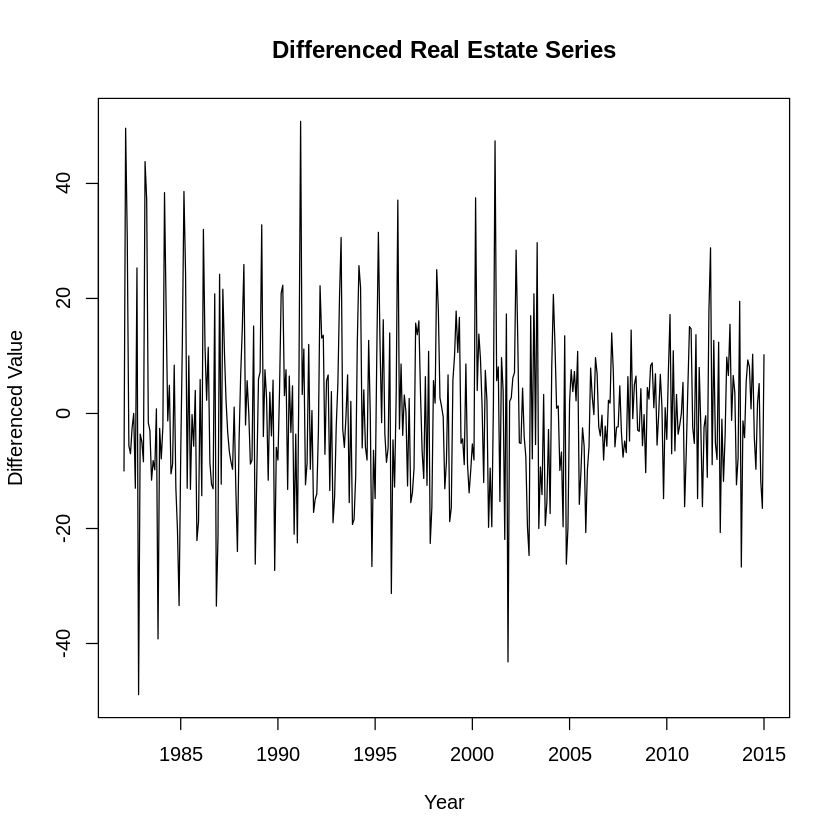

In [47]:
# Apply regular differencing if needed
if(ndiffs_re > 0) {
  re_diff <- diff(re_ts, differences = ndiffs_re)
  plot(re_diff, main = "Differenced Real Estate Series",
       xlab = "Year", ylab = "Differenced Value")
  adf_test_re_diff <- adf.test(re_diff)
  print(adf_test_re_diff)
}


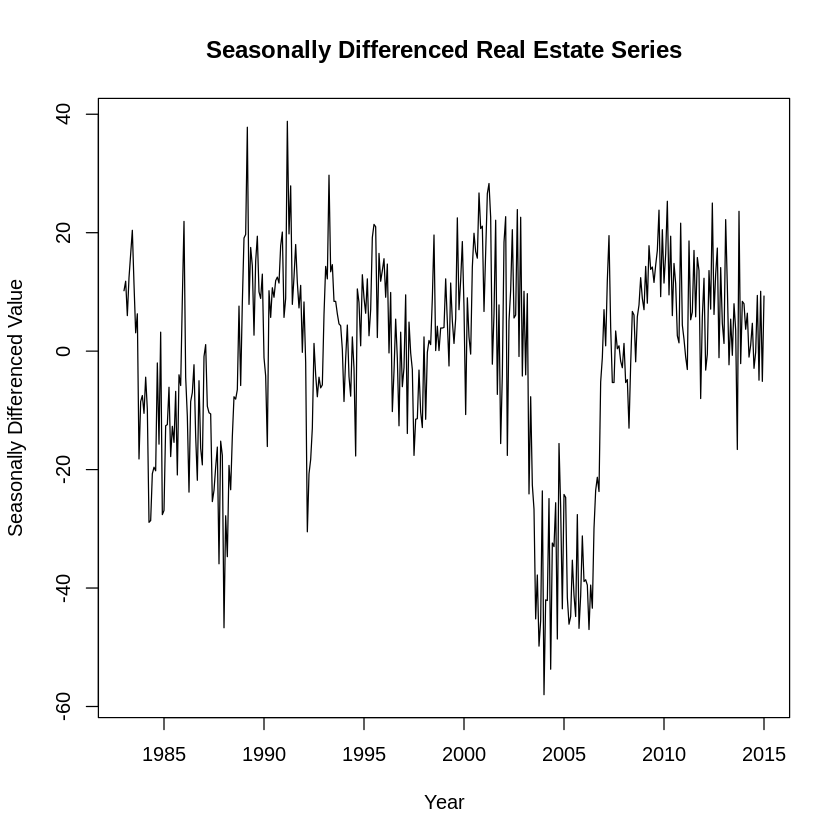

In [48]:
# Apply seasonal differencing if needed
if(nsdiffs_re > 0) {
  re_sdiff <- diff(re_ts, lag = frequency(re_ts))
  plot(re_sdiff, main = "Seasonally Differenced Real Estate Series",
       xlab = "Year", ylab = "Seasonally Differenced Value")
}

Model Selection

Linear and Non-linear Trend Model

In [53]:
# Create time index
t_re <- 1:length(re_ts)
nt_re <- (t_re - mean(t_re))/sd(t_re)  # standardized time

In [54]:
# Fit models with different specifications
mod_re1 <- lm(re_ts ~ t_re)  # Simple linear trend
mod_re2 <- lm(re_ts ~ t_re + I(t_re^2))  # Quadratic trend

In [55]:
# Create seasonal components
MC_re <- matrix(0, length(re_ts), 6)
MS_re <- matrix(0, length(re_ts), 6)
for(i in 1:6) MC_re[,i] <- cos(2*pi*t_re/(12/i))
for(i in 1:6) MS_re[,i] <- sin(2*pi*t_re/(12/i))


In [56]:
# Model with seasonality
mod_re3 <- lm(re_ts ~ t_re + MC_re + MS_re)

In [57]:
# Compare models using AIC
re_models <- list(mod_re1, mod_re2, mod_re3)
re_aic <- sapply(re_models, AIC)
print(re_aic)
best_re_model_index <- which.min(re_aic)
print(paste("Best model based on AIC:", best_re_model_index))

[1] 3944.657 3924.973 3875.511
[1] "Best model based on AIC: 3"


Check for Structural Breaks

In [52]:
final_diff <- re_diff


	 Optimal 4-segment partition: 

Call:
breakpoints.formula(formula = re_ts ~ t_re)

Breakpoints at observation number:
86 243 302 

Corresponding to breakdates:
1989(2) 2002(3) 2007(2) 


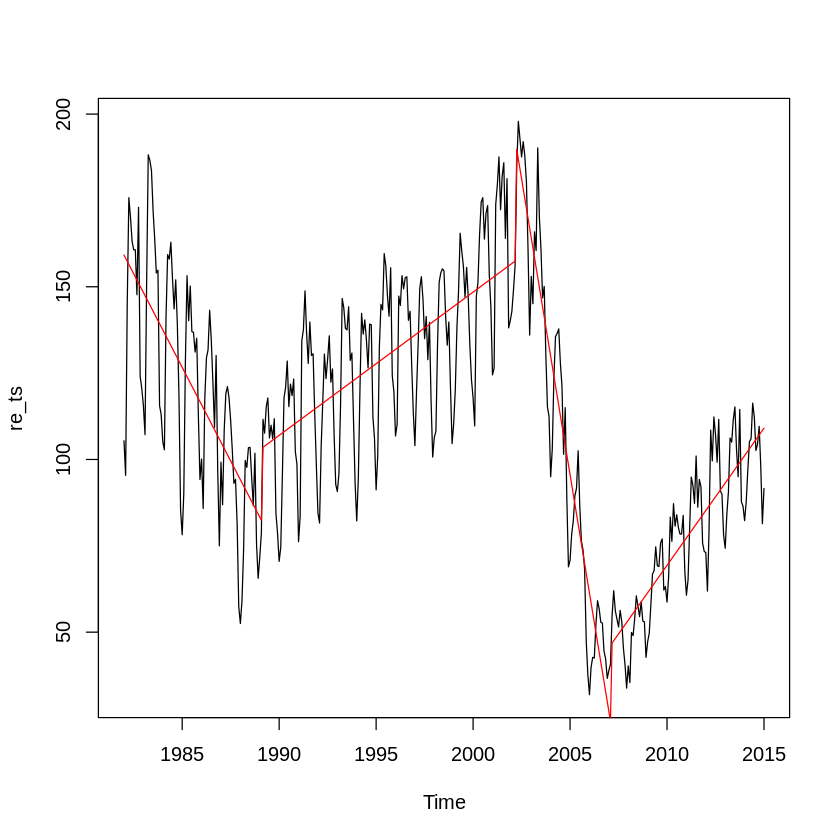

In [58]:
# Check for structural breaks
re_breaks <- breakpoints(re_ts ~ t_re)
print(re_breaks)
plot(re_ts)
lines(fitted(re_breaks), col = "red")

In [63]:
# Model with structural breaks
if(length(re_breaks$breakpoints) > 0) {
  mod_re_breaks <- lm(re_ts ~ breakfactor(re_breaks)*t_re)
  summary(mod_re_breaks)

  # Add seasonality to the structural break model
  mod_re_breaks_seas <- lm(re_ts ~ breakfactor(re_breaks)*t_re +
                          seasonaldummy(re_ts))

  # Compare with previous best model
  print(AIC(re_models[[best_re_model_index]]))
  print(AIC(mod_re_breaks))
  print(AIC(mod_re_breaks_seas))
}

[1] 3875.511
[1] 3454.216
[1] 2994.385


ARIMA/SARIMA Modeling

In [64]:
auto_arima_re <- auto.arima(re_ts, seasonal = TRUE)
summary(auto_arima_re)

Series: re_ts 
ARIMA(1,0,2)(0,1,2)[12] 

Coefficients:
         ar1      ma1     ma2     sma1     sma2
      0.9843  -0.5293  0.0808  -0.6681  -0.1002
s.e.  0.0091   0.0542  0.0542   0.0530   0.0514

sigma^2 = 74.01:  log likelihood = -1377.57
AIC=2767.15   AICc=2767.37   BIC=2790.87

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.1494857 8.416518 6.519182 -0.2064152 6.694977 0.4799658
                    ACF1
Training set 0.004623448

Coefficients (± std. error):

AR1 = 0.9843 (0.0091)

MA1 = –0.5293 (0.0542), MA2 = 0.0808 (0.0542)

Seasonal MA1 = –0.6681 (0.0530), SMA2 = –0.1002 (0.0514)



**<h3> Residual diagnostics </h3>**


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(0,1,2)[12]
Q* = 25.018, df = 19, p-value = 0.1599

Model df: 5.   Total lags used: 24



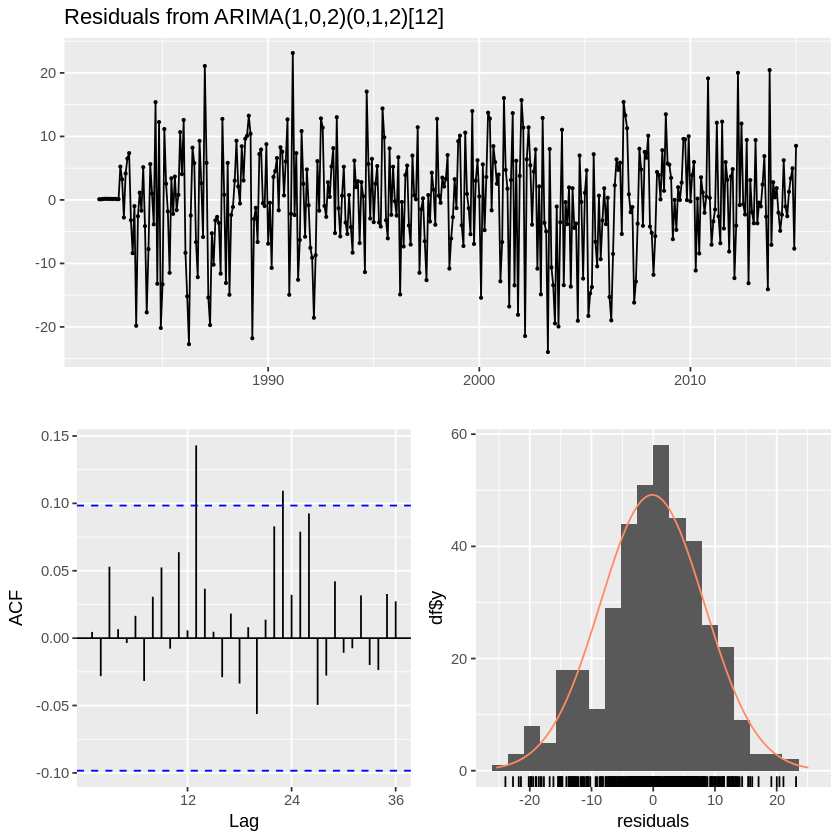

In [65]:

# Check residuals
checkresiduals(auto_arima_re)

From the checkresiduals plots the residuals appear roughly Gaussian and homoscedastic—no strong ARCH signal was flagged here.

In [66]:
# Compare with previous best model using AIC
print(AIC(auto_arima_re))

[1] 2767.15


In [75]:
#  Extract the residuals from your fitted SARIMA
re_resid <- residuals(auto_arima_re)

In [77]:

# Shapiro–Wilk test for normality
shapiro_result_re <- shapiro.test(re_resid)
print(shapiro_result_re)


	Shapiro-Wilk normality test

data:  re_resid
W = 0.98952, p-value = 0.006116



p‑value; p < 0.05 means residuals deviate from Normal.

In [79]:
install.packages("FinTS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
library(FinTS)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf




In [84]:
#ARCH LM test for heteroscedasticity
arch_result_re <- ArchTest(re_resid, lags = 12)
print(arch_result_re)



	ARCH LM-test; Null hypothesis: no ARCH effects

data:  re_resid
Chi-squared = 9.1819, df = 12, p-value = 0.6873



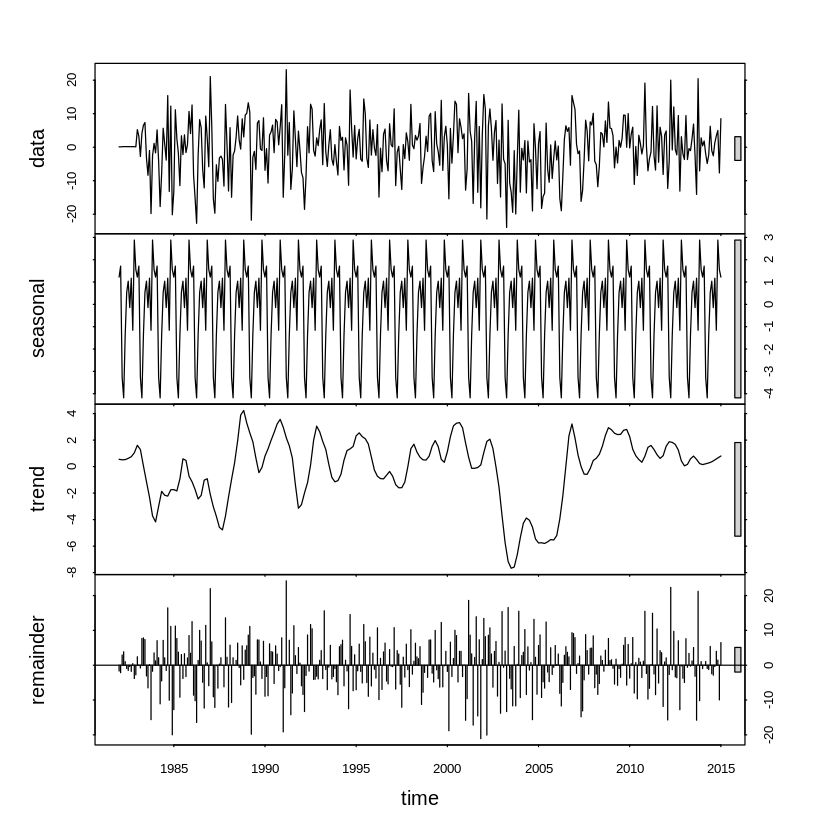

In [85]:
#STL decomposition of the residuals

resid_ts_re <- ts(re_resid,
                  start = start(re_ts),   # e.g. c(2000, 1)
                  frequency = frequency(re_ts))  # e.g. 12 for monthly

decomp_resid_re <- stl(resid_ts_re, s.window = "periodic")
plot(decomp_resid_re)

The re_resid has have the same frequency & start as re_ts

Model Selection and Validation


In [72]:
# Function to evaluate model residuals
evaluate_residuals <- function(model, series_name) {
  if(class(model)[1] == "Arima") {
    res <- residuals(model)
  } else {
    res <- model$residuals
  }

  # Ljung-Box test for residual autocorrelation
  lb_test <- Box.test(res, lag = 12, type = "Ljung-Box")

  # Shapiro-Wilk test for normality
  sw_test <- shapiro.test(res)

  cat("Residual Evaluation for", series_name, "model:\n")
  cat("Ljung-Box test p-value:", lb_test$p.value, "\n")
  cat("Shapiro-Wilk test p-value:", sw_test$p.value, "\n")

  # Plot residuals
  par(mfrow = c(2,2))
  plot(res, main = paste("Residuals for", series_name))
  acf(res, main = paste("ACF of Residuals for", series_name))
  hist(res, main = paste("Histogram of Residuals for", series_name))
  qqnorm(res)
  qqline(res)
}

In [73]:
evaluate_residuals

function (model, series_name) 
{
    if (class(model)[1] == "Arima") {
        res <- residuals(model)
    }
    else {
        res <- model$residuals
    }
    lb_test <- Box.test(res, lag = 12, type = "Ljung-Box")
    sw_test <- shapiro.test(res)
    cat("Residual Evaluation for", series_name, "model:\n")
    cat("Ljung-Box test p-value:", lb_test$p.value, "\n")
    cat("Shapiro-Wilk test p-value:", sw_test$p.value, "\n")
    par(mfrow = c(2, 2))
    plot(res, main = paste("Residuals for", series_name))
    acf(res, main = paste("ACF of Residuals for", series_name))
    hist(res, main = paste("Histogram of Residuals for", series_name))
    qqnorm(res)
    qqline(res)
}